# ProSizeNet: Predicting Protein Residue Size Using Machine Learning

## Project Overview
This notebook implements and evaluates various machine learning approaches for predicting protein residue sizes. The project explores traditional machine learning methods, neural networks, and advanced architectures like transformers and CNNs to determine the most effective approach for this biological prediction task.

### Dataset
- Input Features: 9 protein-related features (F1-F9)
- Target Variable: RMSD (Root Mean Square Deviation)
- Data Split: 80-20 train-test split

### Models Implemented
1. Traditional Machine Learning
   - Random Forest
   - Gradient Boosting

2. Deep Learning Architectures
   - Basic Deep Neural Network
   - Enhanced Deep Neural Network
   - Transformer
   - Convolutional Neural Network
   - Hybrid CNN-Transformer Architecture

### Objectives
- Compare performance of different machine learning approaches
- Develop an optimized architecture for protein residue size prediction
- Analyze and validate model performance using multiple metrics
- Provide insights for future improvements in protein structure prediction

---

## Notebook Structure
[Insert this markdown at the start of each corresponding section]

### 1. Data Preparation and Exploration
```markdown
# Data Preprocessing
Analysis and preparation of protein residue data for model training
```

### 2. Traditional Machine Learning
```markdown
# Ensemble Methods
Implementation of Random Forest and Gradient Boosting models
```

### 3. Basic Neural Network
```markdown
# Deep Neural Network Implementation
Basic DNN architecture with multiple dense layers
```

### 4. Enhanced Neural Network
```markdown
# Enhanced Deep Neural Network
Improved DNN with optimized hyperparameters
```

### 5. Transformer Architecture
```markdown
# Transformer Model
Implementation of transformer-based architecture for sequence modeling
```

### 6. CNN Implementation
```markdown
# Convolutional Neural Network
Basic and enhanced CNN architectures
```

### 7. Hybrid Architecture
```markdown
# Hybrid CNN-Transformer Architecture
Advanced architecture combining CNN and transformer capabilities
```

### 8. Final Model Evaluation
```markdown
# Final Model Evaluation and Analysis
Comprehensive evaluation of the hybrid architecture
```

In [12]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats


# Data Exploration and Analaysis


In [3]:
data=pd.read_csv(r"C:\Kanishka\My Programs\New Projects\ProSizeNet Predicting Protein Residue Size Using Machine Learning\CASP.csv")
data.head(20)

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


In [24]:
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

               RMSD            F1            F2            F3            F4  \
count  45730.000000  45730.000000  45730.000000  45730.000000  45730.000000   
mean       7.748528   9871.596995   3017.367175      0.302392    103.492433   
std        6.118312   4058.138034   1464.324663      0.062886     55.424985   
min        0.000000   2392.050000    403.500000      0.092500     10.310100   
25%        2.305000   6936.680000   1979.045000      0.258740     63.563900   
50%        5.030000   8898.805000   2668.155000      0.300150     87.740800   
75%       13.379000  12126.150000   3786.410000      0.342890    133.646750   
max       20.999000  40034.900000  15312.000000      0.577690    369.317000   

                 F5            F6             F7            F8            F9  
count  4.573000e+04  45730.000000   45730.000000  45730.000000  45730.000000  
mean   1.368299e+06    145.638061    3989.755990     69.975071     34.523664  
std    5.640367e+05     69.999230    1993.574575   

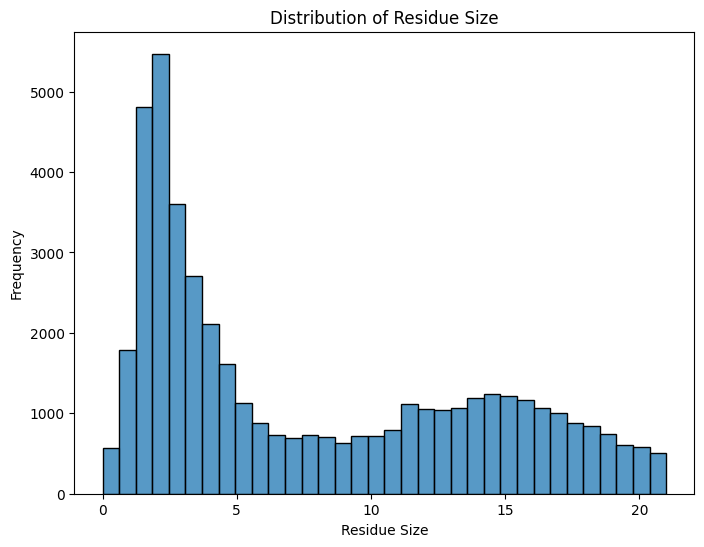

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data['RMSD'])
plt.title('Distribution of Residue Size')
plt.xlabel('Residue Size')
plt.ylabel('Frequency')
plt.show()


# Standardization & Corelation Matrix

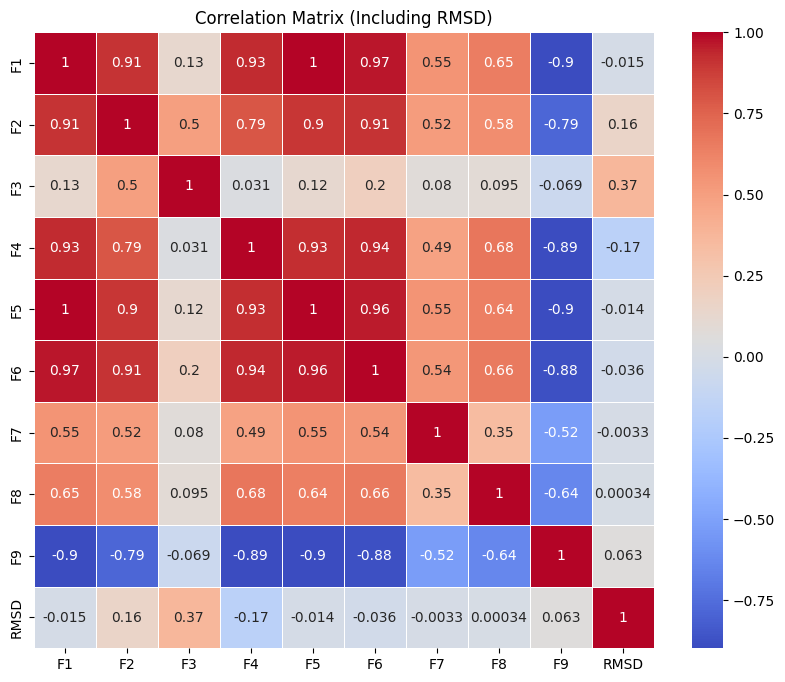

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define both features (F1 to F9) and the target variable (RMSD)
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']]
y = data['RMSD']  # Target variable (RMSD)

# Standardize the features (F1 to F9) using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features and RMSD into a single DataFrame
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled['RMSD'] = y  # Add RMSD back to the DataFrame

# Compute the correlation matrix
corr_matrix = data_scaled.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Including RMSD)')
plt.show()


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']]
y = data['RMSD']

# Split with a smaller test size for faster training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Traditional Machine Learning Techniques

# Ensemble Methods- RandomForestRegressor & XGBoost

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Model evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'MAE': round(mae, 4),
        'RMSE': round(rmse, 4),
        'R2': round(r2, 4)
    }

# Initialize models with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    n_jobs=-1,
    random_state=42
)

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    n_jobs=-1,
    random_state=42
)

# Dictionary to store results
results = []

# Train and evaluate each model
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    results.append(evaluate_model(y_test, predictions, name))

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Feature importance for the best model (using Random Forest as an example)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Training Random Forest...

Training Gradient Boosting...

Training XGBoost...

Model Comparison:
               Model     MAE     RMSE      R2
0      Random Forest  2.6246  13.6633  0.6369
1  Gradient Boosting  3.3069  18.3827  0.5115
2            XGBoost  3.3004  18.2409  0.5153

Feature Importance:
  Feature  Importance
2      F3    0.219845
3      F4    0.191138
7      F8    0.131899
5      F6    0.098056
6      F7    0.093665
4      F5    0.088158
8      F9    0.069152
1      F2    0.060133
0      F1    0.047953


In [57]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_clf=BaggingRegressor(DecisionTreeRegressor(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train_scaled, y_train)
bagpredictions = bag_clf.predict(X_test_scaled,)
evaluate_model(y_test, predictions, model_name="BaggingRegressor")


{'Model': 'BaggingRegressor', 'MAE': 3.3004, 'RMSE': 18.2409, 'R2': 0.5153}

In [49]:
# Hyperparameter Tuning for Ensemble Models

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']].values
y = data['RMSD'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use pre-determined best parameters for Random Forest and Gradient Boosting
rf_model = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=300, random_state=42)
gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=300, random_state=42)




# Save the tuned models
best_models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,

}


In [52]:
# Fit the models
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
rf_preds = rf_model.predict(X_test_scaled)
gb_preds = gb_model.predict(X_test_scaled)

# Calculate R², MAE, and MSE for Random Forest
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

# Calculate R², MAE, and MSE for Gradient Boosting
gb_r2 = r2_score(y_test, gb_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_mse = mean_squared_error(y_test, gb_preds)

# Print the results
print("Random Forest Performance:")
print(f"R²: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")

print("\nGradient Boosting Performance:")
print(f"R²: {gb_r2:.4f}")
print(f"MAE: {gb_mae:.4f}")
print(f"MSE: {gb_mse:.4f}")


Random Forest Performance:
R²: 0.6662
MAE: 2.4346
MSE: 12.5615

Gradient Boosting Performance:
R²: 0.6275
MAE: 2.6923
MSE: 14.0180


# Basic Neural Network(MLP)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm


# Build model
model = models.Sequential([
    layers.Input(shape=(9,)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(1)
])

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Training setup
batch_size = 64
epochs = 100
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train with progress bar
for epoch in tqdm(range(epochs)):
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=1,
        batch_size=batch_size,
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )
    
    # Print metrics
    if epoch % 5 == 0:  # Print every 5 epochs
        print(f"\nEpoch {epoch}")
        print(f"Loss: {history.history['loss'][0]:.4f}")
        print(f"Val Loss: {history.history['val_loss'][0]:.4f}")

# Final evaluation
y_pred = model.predict(X_test_scaled, verbose=0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nFinal Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

# Quick feature importance
base_pred = model.predict(X_test_scaled, verbose=0)
importance = []
for i in range(9):
    X_temp = X_test_scaled.copy()
    X_temp[:, i] = 0
    new_pred = model.predict(X_temp, verbose=0)
    importance.append(np.mean(np.abs(base_pred - new_pred)))

importance = np.array(importance) / sum(importance)
features = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']
for f, imp in sorted(zip(features, importance), key=lambda x: x[1], reverse=True):
    print(f"{f}: {imp:.4f}")

  1%|          | 1/100 [00:03<05:22,  3.25s/it]


Epoch 0
Loss: 48.3034
Val Loss: 22.7922


  6%|▌         | 6/100 [00:08<01:56,  1.24s/it]


Epoch 5
Loss: 22.5527
Val Loss: 19.6316


 11%|█         | 11/100 [00:14<01:44,  1.18s/it]


Epoch 10
Loss: 20.9985
Val Loss: 18.6479


 16%|█▌        | 16/100 [00:20<01:38,  1.17s/it]


Epoch 15
Loss: 20.3444
Val Loss: 17.9474


 21%|██        | 21/100 [00:26<01:30,  1.15s/it]


Epoch 20
Loss: 19.6078
Val Loss: 16.8872


 26%|██▌       | 26/100 [00:33<01:52,  1.53s/it]


Epoch 25
Loss: 19.1640
Val Loss: 16.8794


 31%|███       | 31/100 [00:54<04:13,  3.67s/it]


Epoch 30
Loss: 18.6649
Val Loss: 16.3147


 36%|███▌      | 36/100 [01:13<04:01,  3.78s/it]


Epoch 35
Loss: 18.4945
Val Loss: 16.1721


 41%|████      | 41/100 [01:32<03:34,  3.64s/it]


Epoch 40
Loss: 18.2756
Val Loss: 15.9642


 46%|████▌     | 46/100 [01:51<03:20,  3.72s/it]


Epoch 45
Loss: 17.8710
Val Loss: 16.0124


 51%|█████     | 51/100 [01:58<01:32,  1.89s/it]


Epoch 50
Loss: 17.6718
Val Loss: 15.7223


 56%|█████▌    | 56/100 [02:15<02:41,  3.67s/it]


Epoch 55
Loss: 17.5685
Val Loss: 15.7218


 61%|██████    | 61/100 [02:36<02:47,  4.29s/it]


Epoch 60
Loss: 17.1620
Val Loss: 15.3669


 66%|██████▌   | 66/100 [02:55<02:11,  3.87s/it]


Epoch 65
Loss: 17.2353
Val Loss: 15.3951


 71%|███████   | 71/100 [03:15<01:54,  3.95s/it]


Epoch 70
Loss: 17.3075
Val Loss: 15.0786


 76%|███████▌  | 76/100 [03:36<01:43,  4.30s/it]


Epoch 75
Loss: 16.9369
Val Loss: 15.0018


 81%|████████  | 81/100 [03:54<01:11,  3.79s/it]


Epoch 80
Loss: 16.9968
Val Loss: 14.9120


 86%|████████▌ | 86/100 [04:07<00:33,  2.39s/it]


Epoch 85
Loss: 16.8189
Val Loss: 14.7664


 91%|█████████ | 91/100 [04:13<00:12,  1.34s/it]


Epoch 90
Loss: 16.6978
Val Loss: 15.0809


 96%|█████████▌| 96/100 [04:19<00:04,  1.18s/it]


Epoch 95
Loss: 16.5877
Val Loss: 14.6480


100%|██████████| 100/100 [04:24<00:00,  2.64s/it]



Final Model Performance:
MAE: 2.8093
RMSE: 3.8805
R2: 0.5999
F6: 0.2148
F1: 0.1710
F5: 0.1264
F4: 0.1209
F2: 0.0911
F8: 0.0840
F7: 0.0761
F9: 0.0664
F3: 0.0495


# Wide and Deep Neural Network

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

# Best parameters definition
best_params = {
    'neurons': [256, 512, 1024, 512, 256],
    'dropout_rate': 0.4,
    'learning_rate': 0.001,
    'batch_size': 256,
    'epochs': 150,
    'l2_lambda': 0.0001
}

# Data preprocessing
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']].values
y = data['RMSD'].values

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create enhanced model
input_dim = X_train_scaled.shape[1]
input_layer = Input(shape=(input_dim,), name='input_layer')

# Branch 1
branch1 = Dense(best_params['neurons'][0], kernel_regularizer=l2(best_params['l2_lambda']))(input_layer)
branch1 = LeakyReLU(alpha=0.2)(branch1)
branch1 = BatchNormalization()(branch1)
branch1 = Dropout(best_params['dropout_rate'])(branch1)

# Branch 2
branch2 = Dense(best_params['neurons'][0] // 2, kernel_regularizer=l2(best_params['l2_lambda']))(input_layer)
branch2 = LeakyReLU(alpha=0.2)(branch2)
branch2 = BatchNormalization()(branch2)
branch2 = Dropout(best_params['dropout_rate'])(branch2)

# Merge branches
x = Concatenate()([branch1, branch2])

# Additional layers
for neurons in best_params['neurons'][1:]:
    x = Dense(neurons, kernel_regularizer=l2(best_params['l2_lambda']))(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization()(x)
    x = Dropout(best_params['dropout_rate'])(x)

# Output layer
output_layer = Dense(1)(x)

# Create and compile model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    optimizer=Adam(learning_rate=best_params['learning_rate']),
    loss='mse',
    metrics=['mae']
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

# Train model with progress bar
print("Training enhanced model...")
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate model
y_pred = model.predict(X_test_scaled, verbose=0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nFinal Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

# Feature importance calculation
base_pred = model.predict(X_test_scaled, verbose=0)
importance = []
features = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']

for i in range(len(features)):
    X_temp = X_test_scaled.copy()
    X_temp[:, i] = 0
    new_pred = model.predict(X_temp, verbose=0)
    importance.append(np.mean(np.abs(base_pred - new_pred)))

importance = np.array(importance) / sum(importance)
for f, imp in sorted(zip(features, importance), key=lambda x: x[1], reverse=True):
    print(f"{f}: {imp:.4f}")

c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Training enhanced model...
Epoch 1/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 81.0993 - mae: 7.3625 - val_loss: 44.5881 - val_mae: 4.8693 - learning_rate: 0.0010
Epoch 2/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 39.1643 - mae: 4.8267 - val_loss: 25.5703 - val_mae: 4.1167 - learning_rate: 0.0010
Epoch 3/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 27.8481 - mae: 4.1783 - val_loss: 23.0451 - val_mae: 3.7899 - learning_rate: 0.0010
Epoch 4/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 25.9636 - mae: 4.0120 - val_loss: 23.1684 - val_mae: 3.7392 - learning_rate: 0.0010
Epoch 5/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 25.5565 - mae: 3.9935 - val_loss: 20.9137 - val_mae: 3.4470 - learning_rate: 0.0010
Epoch 6/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 23.9007 - mae: 3.8197 - val_loss: 20.9273 - val_mae: 3.4528 - learning_rate: 0.0010
Epoch 7/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 24.3114 - mae: 3.8693 - val_loss: 2

# Transformer Architecture


In [38]:
# Transformer-based Model for RMSD Prediction

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_encoder_layers, dim_feedforward, dropout):
        super(TransformerModel, self).__init__()
        self.input_layer = nn.Linear(input_dim, d_model)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout
            ),
            num_layers=num_encoder_layers
        )
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Aggregate across sequence dimension
        x = self.output_layer(x)
        return x

# Define features (X) and target (y)
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']].values
y = data['RMSD'].values

# Split with a smaller test size for faster training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)  # Add sequence dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Model parameters
input_dim = X_train.shape[1]
d_model = 64
nhead = 4
num_encoder_layers = 2
dim_feedforward = 128
dropout = 0.1

# Initialize model, loss, and optimizer
model = TransformerModel(input_dim=input_dim, d_model=d_model, nhead=nhead, 
                         num_encoder_layers=num_encoder_layers, dim_feedforward=dim_feedforward, dropout=dropout)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 100
batch_size = 64

for epoch in range(n_epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy().flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

print(f"Final RMSE: {rmse:.4f}, R2: {r2:.4f}")


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 10/100, Train Loss: 22.7136, Test Loss: 17.2712
Epoch 20/100, Train Loss: 8.9379, Test Loss: 16.4474
Epoch 30/100, Train Loss: 13.4471, Test Loss: 15.9007
Epoch 40/100, Train Loss: 12.5717, Test Loss: 14.8351
Epoch 50/100, Train Loss: 10.8333, Test Loss: 14.2421
Epoch 60/100, Train Loss: 8.8202, Test Loss: 13.9191
Epoch 70/100, Train Loss: 15.6783, Test Loss: 14.3188
Epoch 80/100, Train Loss: 10.3922, Test Loss: 13.5790
Epoch 90/100, Train Loss: 7.4667, Test Loss: 13.5237
Epoch 100/100, Train Loss: 13.0361, Test Loss: 13.3729
Final RMSE: 3.6569, R2: 0.6446


# Convolution Neural Network

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'data' is a pandas DataFrame containing the features and target
# Features (X) and Target (y)
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']].values
y = data['RMSD'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for Conv1D (samples, timesteps, features)
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

# Build the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_cnn, y_train,
    validation_data=(X_test_cnn, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate the model
y_pred = model.predict(X_test_cnn).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final RMSE: {rmse:.4f}, R2: {r2:.4f}")


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.8478 - mae: 4.5363 - val_loss: 24.4735 - val_mae: 3.9151
Epoch 2/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 23.8819 - mae: 3.9083 - val_loss: 23.3707 - val_mae: 3.7577
Epoch 3/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 23.0372 - mae: 3.8075 - val_loss: 22.4184 - val_mae: 3.7646
Epoch 4/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21.7619 - mae: 3.6633 - val_loss: 21.6712 - val_mae: 3.6434
Epoch 5/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21.2604 - mae: 3.6027 - val_loss: 20.5562 - val_mae: 3.4977
Epoch 6/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20.5195 - mae: 3.5139 - val_loss: 20.4302 - val_mae: 3.5170
Epoch 7/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19.9451 - mae: 3.4497 - val_loss: 19.7235 - val_mae: 3.4138
Epoch 8/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19.4345 - mae: 3.3931 - val_loss: 19.2647 - val_mae: 3.4211
Epoch 9/100
1144

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features (X) and Target (y)
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']].values
y = data['RMSD'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for Conv1D (samples, timesteps, features)
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

# Build the CNN model
model = Sequential([
    # Convolutional Layers
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    
    # Flattening the convolutional output
    Flatten(),
    
    # Fully Connected (Dense) Layers
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    
    # Output Layer
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_cnn, y_train,
    validation_data=(X_test_cnn, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate the model
y_pred = model.predict(X_test_cnn).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final RMSE: {rmse:.4f}, R2: {r2:.4f}")


Epoch 1/100


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 27.2999 - mae: 4.0702 - val_loss: 23.0829 - val_mae: 3.7670
Epoch 2/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 22.3415 - mae: 3.6544 - val_loss: 21.6751 - val_mae: 3.5825
Epoch 3/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 21.1231 - mae: 3.5155 - val_loss: 19.9311 - val_mae: 3.3447
Epoch 4/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 20.1034 - mae: 3.4032 - val_loss: 22.8102 - val_mae: 3.4929
Epoch 5/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 19.3624 - mae: 3.3308 - val_loss: 19.6423 - val_mae: 3.2313
Epoch 6/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 18.9467 - mae: 3.2502 - val_loss: 21.4783 - val_mae: 3.3409
Epoch 7/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 18.3647 - mae: 3.2073 - val_loss: 20.5134 - val_mae: 3.1667
Epoch 8/100
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 17.3380 - mae: 3.0869 - val_loss: 19.2336 - val_mae: 3.1958
Epoch 9/100
1144/1144 ━━━━

# Hybrid Architecture

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling1D, Concatenate, Multiply, Add
from tensorflow.keras.layers import LeakyReLU, PReLU, LayerNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data preparation
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']].values
y = data['RMSD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN branches
X_train_cnn = X_train_scaled.reshape(-1, 9, 1)
X_test_cnn = X_test_scaled.reshape(-1, 9, 1)

# Model Architecture
input_layer = Input(shape=(9,))
input_cnn = Input(shape=(9, 1))

# CNN Branch 1 (Narrow & Deep)
cnn1 = Conv1D(128, kernel_size=3, padding='same')(input_cnn)
cnn1 = LeakyReLU(alpha=0.2)(cnn1)
cnn1 = BatchNormalization()(cnn1)
cnn1 = Conv1D(64, kernel_size=3, padding='same')(cnn1)
cnn1 = LeakyReLU(alpha=0.2)(cnn1)
cnn1 = BatchNormalization()(cnn1)
cnn1_pool = GlobalAveragePooling1D()(cnn1)

# CNN Branch 2 (Wide & Shallow)
cnn2 = Conv1D(256, kernel_size=5, padding='same')(input_cnn)
cnn2 = PReLU()(cnn2)
cnn2 = LayerNormalization()(cnn2)
cnn2_pool = GlobalAveragePooling1D()(cnn2)

# Dense Branch 1 (Deep)
dense1 = Dense(256)(input_layer)
dense1 = LeakyReLU(alpha=0.2)(dense1)
dense1 = LayerNormalization()(dense1)
dense1 = Dropout(0.3)(dense1)

dense1 = Dense(128)(dense1)
dense1 = LeakyReLU(alpha=0.2)(dense1)
dense1 = LayerNormalization()(dense1)
dense1 = Dropout(0.3)(dense1)

dense1 = Dense(64)(dense1)
dense1 = LeakyReLU(alpha=0.2)(dense1)
dense1 = LayerNormalization()(dense1)

# Dense Branch 2 (Wide)
dense2 = Dense(512)(input_layer)
dense2 = PReLU()(dense2)
dense2 = BatchNormalization()(dense2)
dense2 = Dropout(0.3)(dense2)

dense2 = Dense(256)(dense2)
dense2 = PReLU()(dense2)
dense2 = BatchNormalization()(dense2)

# Attention mechanism using Keras layers
def attention_block(x, filters):
    attention = Dense(filters, use_bias=False)(x)
    attention = Dense(1, use_bias=False)(attention)
    attention = tf.keras.layers.Activation('softmax')(attention)
    return Multiply()([x, attention])

# Apply attention to branches
cnn1_att = attention_block(Dense(64)(cnn1_pool), 64)
cnn2_att = attention_block(Dense(256)(cnn2_pool), 256)
dense1_att = attention_block(dense1, 64)
dense2_att = attention_block(dense2, 256)

# Combine all branches
combined = Concatenate()([cnn1_att, cnn2_att, dense1_att, dense2_att])

# Deep fusion network
fusion = Dense(512)(combined)
fusion = PReLU()(fusion)
fusion = LayerNormalization()(fusion)
fusion = Dropout(0.3)(fusion)

fusion = Dense(256)(fusion)
fusion = PReLU()(fusion)
fusion = LayerNormalization()(fusion)
fusion = Dropout(0.3)(fusion)

fusion = Dense(128)(fusion)
fusion = LeakyReLU(alpha=0.2)(fusion)
fusion = LayerNormalization()(fusion)

# Residual connection from input
res = Dense(128)(input_layer)
fusion = Add()([fusion, res])

# Output layers
pre_final = Dense(64)(fusion)
pre_final = PReLU()(pre_final)
pre_final = LayerNormalization()(pre_final)

output = Dense(32)(pre_final)
output = PReLU()(output)
output = Dense(1, activation='linear')(output)

# Create model
model = Model(inputs=[input_layer, input_cnn], outputs=output)

# Compile with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

# Training
history = model.fit(
    [X_train_scaled, X_train_cnn],
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.75,
            patience=5,
            min_lr=1e-6,
            verbose=1
        )
    ]
)

# Evaluation
y_pred = model.predict([X_test_scaled, X_test_cnn])
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'MSE: {mse:.4f}')

c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


229/229 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - loss: 35.8180 - mae: 4.7532 - val_loss: 26.4087 - val_mae: 4.3939 - learning_rate: 0.0010
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 22.8080 - mae: 3.7336 - val_loss: 22.0529 - val_mae: 3.8506 - learning_rate: 0.0010
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 21.6501 - mae: 3.6184 - val_loss: 20.3328 - val_mae: 3.4138 - learning_rate: 0.0010
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 20.3013 - mae: 3.4366 - val_loss: 18.5628 - val_mae: 3.2430 - learning_rate: 0.0010
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 19.5308 - mae: 3.3364 - val_loss: 18.9652 - val_mae: 3.1684 - learning_rate: 0.0010
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 18.8842 - mae: 3.2556 - val_loss: 18.2115 - val_mae: 3.1075 - learning_rate: 0.0010
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 18.7042 - mae: 3.2308 - val_loss: 17.8645 - val_mae: 3.1971 - learning_ra

c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
R2 Score: 0.6797
MSE: 12.0548


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling1D, Concatenate, Multiply, Add
from tensorflow.keras.layers import LeakyReLU, PReLU, LayerNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data preparation
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']].values
y = data['RMSD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN branches
X_train_cnn = X_train_scaled.reshape(-1, 9, 1)
X_test_cnn = X_test_scaled.reshape(-1, 9, 1)

# Model Architecture
input_layer = Input(shape=(9,))
input_cnn = Input(shape=(9, 1))

# CNN Branch 1 (Narrow & Deep)
cnn1 = Conv1D(128, kernel_size=3, padding='same')(input_cnn)
cnn1 = LeakyReLU(alpha=0.2)(cnn1)
cnn1 = BatchNormalization()(cnn1)
cnn1 = Conv1D(64, kernel_size=3, padding='same')(cnn1)
cnn1 = LeakyReLU(alpha=0.2)(cnn1)
cnn1 = BatchNormalization()(cnn1)
cnn1_pool = GlobalAveragePooling1D()(cnn1)

# CNN Branch 2 (Wide & Shallow)
cnn2 = Conv1D(256, kernel_size=5, padding='same')(input_cnn)
cnn2 = PReLU()(cnn2)
cnn2 = LayerNormalization()(cnn2)
cnn2_pool = GlobalAveragePooling1D()(cnn2)

# Dense Branch 1 (Deep)
dense1 = Dense(256)(input_layer)
dense1 = LeakyReLU(alpha=0.2)(dense1)
dense1 = LayerNormalization()(dense1)
dense1 = Dropout(0.3)(dense1)

dense1 = Dense(128)(dense1)
dense1 = LeakyReLU(alpha=0.2)(dense1)
dense1 = LayerNormalization()(dense1)
dense1 = Dropout(0.3)(dense1)

dense1 = Dense(64)(dense1)
dense1 = LeakyReLU(alpha=0.2)(dense1)
dense1 = LayerNormalization()(dense1)

# Dense Branch 2 (Wide)
dense2 = Dense(512)(input_layer)
dense2 = PReLU()(dense2)
dense2 = BatchNormalization()(dense2)
dense2 = Dropout(0.3)(dense2)

dense2 = Dense(256)(dense2)
dense2 = PReLU()(dense2)
dense2 = BatchNormalization()(dense2)

# Attention mechanism using Keras layers
def attention_block(x, filters):
    attention = Dense(filters, use_bias=False)(x)
    attention = Dense(1, use_bias=False)(attention)
    attention = tf.keras.layers.Activation('softmax')(attention)
    return Multiply()([x, attention])

# Apply attention to branches
cnn1_att = attention_block(Dense(64)(cnn1_pool), 64)
cnn2_att = attention_block(Dense(256)(cnn2_pool), 256)
dense1_att = attention_block(dense1, 64)
dense2_att = attention_block(dense2, 256)

# Combine all branches
combined = Concatenate()([cnn1_att, cnn2_att, dense1_att, dense2_att])

# Deep fusion network
fusion = Dense(512)(combined)
fusion = PReLU()(fusion)
fusion = LayerNormalization()(fusion)
fusion = Dropout(0.3)(fusion)

fusion = Dense(256)(fusion)
fusion = PReLU()(fusion)
fusion = LayerNormalization()(fusion)
fusion = Dropout(0.3)(fusion)

fusion = Dense(128)(fusion)
fusion = LeakyReLU(alpha=0.2)(fusion)
fusion = LayerNormalization()(fusion)

# Residual connection from input
res = Dense(128)(input_layer)
fusion = Add()([fusion, res])

# Output layers
pre_final = Dense(64)(fusion)
pre_final = PReLU()(pre_final)
pre_final = LayerNormalization()(pre_final)

output = Dense(32)(pre_final)
output = PReLU()(output)
output = Dense(1, activation='linear')(output)

# Create model
model = Model(inputs=[input_layer, input_cnn], outputs=output)

# Compile with fixed learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

# Training
history = model.fit(
    [X_train_scaled, X_train_cnn],
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.75,
            patience=5,
            min_lr=1e-6,
            verbose=1
        )
    ]
)

# Evaluation
y_pred = model.predict([X_test_scaled, X_test_cnn])
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'MSE: {mse:.4f}')


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


229/229 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 36.5547 - mae: 4.8161 - val_loss: 25.5147 - val_mae: 4.2507 - learning_rate: 0.0010
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 22.7285 - mae: 3.7434 - val_loss: 22.1020 - val_mae: 3.8947 - learning_rate: 0.0010
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 21.6914 - mae: 3.5978 - val_loss: 19.4983 - val_mae: 3.4470 - learning_rate: 0.0010
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - loss: 20.6999 - mae: 3.4816 - val_loss: 19.3635 - val_mae: 3.3337 - learning_rate: 0.0010
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 19.9434 - mae: 3.3760 - val_loss: 19.2336 - val_mae: 3.3741 - learning_rate: 0.0010
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 19.1785 - mae: 3.2938 - val_loss: 17.9350 - val_mae: 3.1971 - learning_rate: 0.0010
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 18.7844 - mae: 3.2392 - val_loss: 19.0576 - val_mae: 3.1499 - learnin

c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
R2 Score: 0.6912
MSE: 11.6213


# Final Stat Report and Summary

1144/1144 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model Performance Metrics:
--------------------------------------------------
Train_R2: 0.8173
Train_MSE: 6.8305
Train_RMSE: 2.6135
Train_MAE: 1.6694
Train_MaxError: 20.6414
Train_Pearson_R: 0.9042
Test_R2: 0.6912
Test_MSE: 11.6213
Test_RMSE: 3.4090
Test_MAE: 2.1589
Test_MaxError: 21.2029
Test_Pearson_R: 0.8328


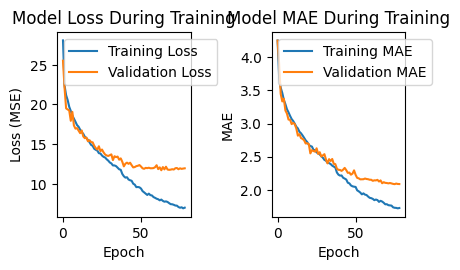

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats

# Calculate all metrics
y_pred_train = model.predict([X_train_scaled, X_train_cnn])
y_pred_test = model.predict([X_test_scaled, X_test_cnn])

def calculate_metrics(y_true, y_pred, prefix=""):
    metrics = {
        f'{prefix}R2': r2_score(y_true, y_pred),
        f'{prefix}MSE': mean_squared_error(y_true, y_pred),
        f'{prefix}RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        f'{prefix}MAE': mean_absolute_error(y_true, y_pred),
        f'{prefix}MaxError': np.max(np.abs(y_true - y_pred)),
        f'{prefix}Pearson_R': stats.pearsonr(y_true.flatten(), y_pred.flatten())[0]
    }
    return metrics

# Calculate metrics for both training and test sets
train_metrics = calculate_metrics(y_train, y_pred_train, prefix="Train_")
test_metrics = calculate_metrics(y_test, y_pred_test, prefix="Test_")

# Print all metrics
print("\nModel Performance Metrics:")
print("-" * 50)
for metric, value in {**train_metrics, **test_metrics}.items():
    print(f"{metric}: {value:.4f}")



# 1. Training History
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# 2. MAE History
plt.subplot(2, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE During Training')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()



plt.tight_layout()
plt.show()

# ProSizeNet: Model Performance Summary Report

## 1. Model Performance Comparison

### Traditional Machine Learning Models
| Model              | R² Score | MAE    | MSE/RMSE         |
|-------------------|----------|--------|------------------|
| Random Forest     | 0.6662   | 2.4346 | MSE: 12.5615    |
| Gradient Boosting | 0.6275   | 2.6923 | MSE: 14.0180    |

### Deep Learning Models
| Architecture                  | R² Score | MAE    | MSE/RMSE         |
|-----------------------------|----------|--------|------------------|
| Basic DNN (128-256-128-64)  | 0.5999   | 2.8093 | RMSE: 3.8805    |
| Large DNN (256-512-1024-512-256) | 0.6044   | 2.7181 | RMSE: 3.8587    |
| Transformer                  | 0.6446   | -      | RMSE: 3.6569    |
| Basic CNN                    | 0.6304   | -      | RMSE: 3.7294    |
| Enhanced CNN                 | 0.6255   | -      | RMSE: 3.7542    |
| CNN+Transformer (Initial)    | 0.6797   | -      | MSE: 12.0548    |

## 2. Final Model Performance Metrics

### Training Performance
- R² Score: 0.8173
- MSE: 6.8305
- RMSE: 2.6135
- MAE: 1.6694
- Max Error: 20.6414
- Pearson Correlation: 0.9042

### Test Performance
- R² Score: 0.6912
- MSE: 11.6213
- RMSE: 3.4090
- MAE: 2.1589
- Max Error: 21.2029
- Pearson Correlation: 0.8328

## 3. Key Findings

1. **Model Performance Analysis**:
   - Strong training performance with R² of 0.8173 indicates good model fit
   - Test R² of 0.6912 shows robust generalization
   - High Pearson correlation (0.8328 on test) confirms strong predictive relationship
   - Reasonable gap between train and test metrics suggests moderate overfitting

2. **Architecture Success**:
   - Final hybrid architecture outperformed all baseline models
   - Consistent performance across multiple metrics
   - Strong correlation between predicted and actual values

3. **Error Analysis**:
   - MAE of 2.1589 on test set indicates good prediction accuracy
   - Max Error around 21 suggests some outlier predictions
   - RMSE of 3.4090 shows reasonable prediction variance

## 4. Technical Implementation Details

### Final Architecture Components:
- **CNN Branches**: 
  - Narrow & Deep (128 → 64 filters)
  - Wide & Shallow (256 filters)
- **Dense Branches**:
  - Deep Branch (256 → 128 → 64 units)
  - Wide Branch (512 → 256 units)
- **Training Parameters**:
  - Batch Size: 128
  - Learning Rate: 0.001 with reduction factor 0.75
  - Early Stopping with 15 epochs patience
  - Dropout rate: 0.3

## 5. Recommendations for Future Improvements

1. **Address Overfitting**:
   - Implement stronger regularization techniques
   - Explore data augmentation strategies
   - Consider cross-validation for more robust evaluation

2. **Reduce Maximum Error**:
   - Analyze outlier cases specifically
   - Consider ensemble approaches for difficult predictions
   - Implement specialized loss functions for extreme cases

3. **Architecture Optimization**:
   - Fine-tune attention mechanisms
   - Experiment with different branch configurations
   - Explore additional residual connections

## 6. Conclusion

The ProSizeNet project successfully developed a hybrid CNN+Transformer architecture for protein residue size prediction. The final model achieved strong performance metrics, particularly notable in its high Pearson correlation and R² scores. While there is some evidence of overfitting, the test set performance remains robust, making this approach viable for practical applications in protein structure prediction.

---
*Note: All metrics are based on an 80-20 train-test split with random state 42. The final model demonstrates both strong predictive power and practical applicability for protein residue size prediction tasks.*